#  Peri Akiva, 169001030

In [8]:
import os
from collections import Counter
import plotly.plotly as py
import matplotlib.mlab as mlab
from plotly.graph_objs import *
import networkx as nx
import pickle as p
import matplotlib.pyplot as plt
import pandas as pd

# Data Preprocessing and Management

In [2]:
def removeZero(path):
    array=[]
    with open(path) as f:
        w,h = [int(x) for x in next(f).split()]
        for line in f:
            line = line.split()
            if '0' not in line:
                array.append(line)
    #with open('edgelist.txt','w') as f:
     #   f.write(str(array))
    return array
    
def pickleGraph(path):
    edges=removeZero(path)
    G=nx.Graph()    
    for i in edges:
        try:
            G.add_edge(i[0],i[1])
        except:
            continue
    G.remove_edges_from(G.selfloop_edges())
    nx.write_gpickle(G,"graph.gpickle")

def loadGraphPickle():
        return nx.read_gpickle("graph.gpickle")

# Graph Plotting

In [ ]:
def plotGraph(G):
    pos=nx.spring_layout(G)
    dmin=1
    ncenter=0
    for n in pos:
        x,y=pos[n]
        d=(x-0.5)**2+(y-0.5)**2
        if d<dmin:
            ncenter=n
            dmin=d
    p=nx.single_source_shortest_path_length(G,ncenter)
    nx.draw_networkx_edges(G,pos,nodelist=[ncenter],alpha=0.4)
    nx.draw_networkx_nodes(G,pos,nodelist=p.keys(),node_size=20,node_color=p.values(),cmap=plt.cm.Reds_r)
    #plt.draw()
    plt.xlim(-.05,1.05)
    plt.ylim(-.05,1.05)
    plt.axis('off')
    plt.show()

def plotDegreeHist(G):
    degreeSeq = sorted(nx.degree(G).values(),reverse=True)
    dmax=max(degreeSeq)
    plt.loglog(degreeSeq,'b-',marker='o')
    plt.title("Degree rank plot")
    plt.ylabel("degree")
    plt.xlabel("rank")
    Gcc = sorted(nx.connected_component_subgraphs(G),key=len,reverse=True)[0]
    pos = nx.spring_layout(Gcc)
    #plt.axis('off')
    nx.draw_networkx_nodes(Gcc,pos,node_size=20)
    nx.draw_networkx_edges(Gcc,pos,alpha=0.4)
    plt.show()

def writeCoresNodes(SccPerCore):
    #with open('nodePerCore.txt','w') as f:
        #f.write(str(nodePerCoreDict))
    with open('SccPerCore.txt','w') as f:
        f.write(str(SccPerCore))
        
def findVerticesEdges(G):
    vePerCore={}
    SccPerCore={}
    for i in xrange(1,18):
        Gtemp = nx.k_core(G,k=i)
        #vePerCore[i]=(Gtemp.number_of_nodes(),Gtemp.number_of_edges())
        #SccPerCore[i]=nx.number_connected_components(Gtemp)
        print SccPerCore[i]
    return SccPerCore

def plotDegree(dic):
    maxVal=max(dic.keys())
    bins = dic.keys()
    plt.yscale('log')
    width = bins[1] - bins[0]
    print "Maximum Degree: " + str(maxVal)
    plt.bar(dic.keys(),dic.values(),width=100)
    plt.title('Degree vs Number of Vertices in each Degree')
    plt.xlabel('Degree')
    plt.ylabel('Number of Edges of Degree')
    plt.show()
    
def plotCC(dic):
    plt.yscale('log')
    plt.bar(dic.keys(),dic.values(),width=1)
    plt.title('NUmber of Connected Components vs NUmber of Vertices in Connected Components')
    plt.xlabel('Number of Connected Components')
    plt.ylabel('Number of Vertices in Connected Components')
    plt.show()


# Edge Decomposition

In [3]:
def edgeDecomp(G):
    edgePerLayer={}    
    allEdges=set(G.edges())
    while len(allEdges)>0:
        Gtemp=nx.Graph()
        Gtemp.add_edges_from(allEdges)
        peelLayer=nx.core_number(Gtemp)
        k=max(peelLayer.values())
        edges={(u,v) for u,v in allEdges if peelLayer[u]==k and peelLayer[v]==k}
        allEdges=allEdges.difference(edges)
        print len(allEdges)
        edgePerLayer[k]=edges
    return edgePerLayer

In [196]:
pathNodes="/home/native/projects/graphDecompose/can_citations.txt"
pathTest="/home/native/projects/graphDecompose/testGraph.txt"
pickleGraph(pathNodes)

In [4]:
G = loadGraphPickle()

# Complete Graph Visualization

In [ ]:
plotGraph(G)
#Attached image

# K-core Decomposition

In [ ]:
Gk = nx.k_core(G)
nScc = nx.number_connected_components(G)
coreN = nx.core_number(G)

In [31]:
print "Total Node: " + str(G.number_of_nodes())
print "Total Edges: " + str(G.number_of_edges())

Total Node: 1559666
Total Edges: 7220605


In [ ]:
nodePerCore=dict(Counter(coreN.values()))
del nodePerCore[0]

In [51]:
print "Core: Number of vertices:\n" + str(nodePerCore)
print "\nMax Core Number: " + str(max(coreN.values()))

Core: Number of vertices:
{1: 365863, 2: 237973, 3: 178756, 4: 140994, 5: 115637, 6: 94887, 7: 79772, 8: 66540, 9: 55080, 10: 46906, 11: 37611, 12: 32062, 13: 25598, 14: 20808, 15: 17572, 16: 14281, 17: 14596, 18: 13006}

Max Core Number: 18


In [52]:
degrees=G.degree()
deg = dict(Counter(degrees.values()))
del deg[0]

Maximum Degree: 7085


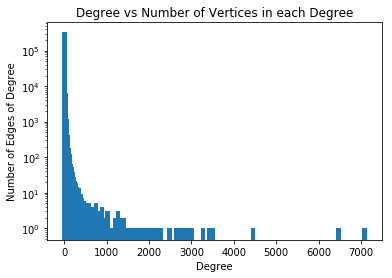

In [53]:
plotDegree(deg)

In [55]:
conComp = nx.connected_components(G)
conComp = [len(c) for c in sorted(conComp, key=len, reverse=True)]
compCount = dict(Counter(conComp))
del compCount[max(compCount.keys())]


In [58]:
print "Number of  connected components and its frequency:\n" + str(compCount)

Number of  connected components and its frequency:
{1: 1724, 2: 17178, 3: 4131, 4: 1478, 5: 633, 6: 323, 7: 177, 8: 91, 9: 56, 10: 38, 11: 29, 12: 13, 13: 21, 14: 10, 15: 6, 16: 5, 17: 4, 18: 4, 19: 2, 20: 2, 21: 1, 22: 3, 23: 1, 24: 2, 27: 2, 29: 1, 36: 1, 42: 1, 45: 2, 47: 1, 56: 1, 83: 1}


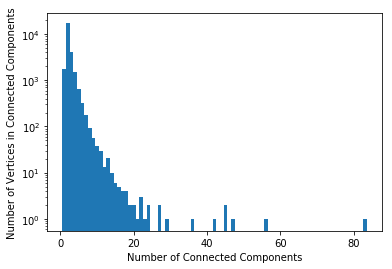

In [247]:
plotCC(compCount)

In [59]:
print "Overall Number of connected components: " + str(nScc)

Overall Number of connected components: 25943


In [6]:
with open('laters.pkl','wb') as f:
    p.dump(layers,f)

In [ ]:
with open('laters.pkl','rb') as f:
    layers=p.load(r)

In [ ]:
layers = edgeDecomp(G)

In [60]:
print "Edge Decomposition Data "
print "Layer   Number of Edges"
for i in layers.keys():
    print " " + str(i) + "         " + str(len(layers[i]))

Edge Decomposition Data 
Layer   Number of Edges
 1         708612
 2         580823
 3         1251188
 4         296900
 5         999772
 6         352608
 7         771976
 8         348821
 9         538978
 10         73677
 11         2102
 12         16960
 13         960404
 14         27929
 15         72597
 16         882
 17         1236
 18         215140
